# Desenvolvimento do modelo machine learning para análise de sentimentos do twitter

In [1]:
# importação de bibliotecas
import pandas as pd

from nltk import word_tokenize
import nltk

### Carregando os dados para treinamento do modelo

In [2]:
# carregando o csv com dados do twitter
tweets_df = pd.read_csv('dataset/twitter_sentiments.csv')

In [3]:
tweets_df.head()

,Unnamed: 0,id,tweet,label,tweet_clean
0,0,1512542155436441600,passar a madrugada vendo elite AMÉM,neutro,passar madrugada vendo elite amém
1,1,1512542146418683904,@joaoluizpedrosa Eu assisti algumas produções ...,negativo,@joaoluizpedrosa assisti algumas produções @ne...
2,2,1512542140013985796,Aff já terminei a 5° temperada de elite. Kkkk ...,neutro,aff terminei 5° temperada elite kkkk #elite5
3,3,1512542138931855365,só tem elite na minha tl e eu nem assisto,neutro,elite tl assisto
4,4,1512542132510380034,chorei a ver elite?,neutro,chorei ver elite?


In [4]:
# expandindo o espaço de exibição das celulas do pandas
pd.set_option('display.max_colwidth', None)

In [5]:
tweets_df.head()

,Unnamed: 0,id,tweet,label,tweet_clean
0,0,1512542155436441600,passar a madrugada vendo elite AMÉM,neutro,passar madrugada vendo elite amém
1,1,1512542146418683904,@joaoluizpedrosa Eu assisti algumas produções da @NetflixES e reparei que a maioria quase não tem negros no elenco… https://t.co/H8kBpauEz8,negativo,@joaoluizpedrosa assisti algumas produções @netflixes reparei maioria quase negros elenco…
2,2,1512542140013985796,Aff já terminei a 5° temperada de elite. Kkkk #Elite5,neutro,aff terminei 5° temperada elite kkkk #elite5
3,3,1512542138931855365,só tem elite na minha tl e eu nem assisto,neutro,elite tl assisto
4,4,1512542132510380034,chorei a ver elite?,neutro,chorei ver elite?


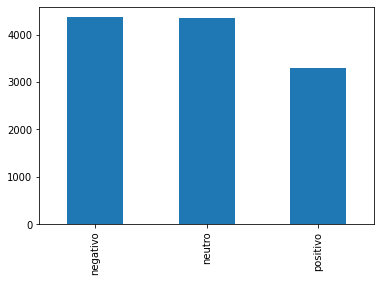

In [6]:
# Visualizando esses dados graficamente:
tweets_df.label.value_counts().plot(kind='bar');

Como podemos observar, os dados estão desequilibrados

## Trabalhando no equilibrio dos dados

In [7]:
minoria = tweets_df.loc[tweets_df['label'] == 'positivo']
meio = tweets_df.loc[tweets_df['label'] == 'neutro']
maioria = tweets_df.loc[tweets_df['label'] == 'negativo']

In [8]:
print('Maioria \n{}'.format(maioria['label'].count()))
print('\n')
print('Meio \n{}'.format(meio['label'].count()))
print('\n')
print('Minoria \n{}'.format(minoria['label'].count()))

Maioria 
4369


Meio 
4340


Minoria 
3291


## Igualar a quantidade de tweets entre positivo, negativo e neutro

#### Oversampling (Criando datasets reorganizados para maioria)

In [9]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)


In [10]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

Unnamed: 0     4369
id             4369
tweet          4369
label          4369
tweet_clean    4369
dtype: int64 Unnamed: 0     4369
id             4369
tweet          4369
label          4369
tweet_clean    4369
dtype: int64 Unnamed: 0     4369
id             4369
tweet          4369
label          4369
tweet_clean    4369
dtype: int64


In [11]:
# juntando os dataframes
tweets_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweets_df_equilibrado_maior = tweets_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_maior.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [12]:
tweets_df_equilibrado_maior

,id,tweet,label,tweet_clean
0,1512545794469072898,Arthur campeão,positivo,arthur campeão
1,1512549692143718400,mds elite virou porno puro 😧,positivo,mds elite virou porno puro 😧
2,1512553355616391175,@picpay @Aguiarthur ARTHUR CAMPEÃO,positivo,@picpay @aguiarthur arthur campeão
3,1512562198715015169,"Enquanto Nenê for nosso camisa 10, a gente não vai ganhar partidas",positivo,"enquanto nenê camisa 10, gente vai ganhar partidas"
4,1512553362562199558,"Pra mim a aliança do Lula com o Alckmin foi uma dois maiores estratégias políticas da nossa história recente, é visionário.",positivo,"pra mim aliança lula alckmin dois maiores estratégias políticas história recente, visionário"
...,...,...,...,...
13102,1512560856122511361,@Clauwild1 @geraldoalckmin @ricardostuckert Já estou até vendo Lula colocar a culpa da derrota no Alckmin 😂😂😂😂😂😂😂,negativo,@clauwild1 @geraldoalckmin @ricardostuckert vendo lula colocar culpa derrota alckmin 😂😂😂😂😂😂😂
13103,1512560851647180802,"@erikakokay Pergunta , o Alckmin era fascista até 2018 , oq houve ?",negativo,"@erikakokay pergunta , alckmin fascista 2018 , oq ?"
13104,1512560815844610050,"Pô, Lula se aliou ao Alckmin...",negativo,"pô, lula aliou alckmin"
13105,1512560812480684039,@bud66588383 @Boscardin Então não vale fingir que não sabia quem era o vice e que não votou no vice...Como fizeram… https://t.co/yR76zXCGSD,negativo,@bud66588383 @boscardin então vale fingir sabia vice votou vicecomo fizeram…


### Undersampling (Criando datasets reorganizados para minoria)

In [13]:
maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)

In [14]:
print(minoria.count(), meio_menor.count(), maior_menor.count() )

Unnamed: 0     3291
id             3291
tweet          3291
label          3291
tweet_clean    3291
dtype: int64 Unnamed: 0     3291
id             3291
tweet          3291
label          3291
tweet_clean    3291
dtype: int64 Unnamed: 0     3291
id             3291
tweet          3291
label          3291
tweet_clean    3291
dtype: int64


In [15]:
# juntando os dataframes
tweets_df_equilibrado_menor = pd.concat([minoria, meio_menor, maior_menor])

# resetando o index
tweets_df_equilibrado_menor = tweets_df_equilibrado_menor.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_menor.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [16]:
tweets_df_equilibrado_menor

,id,tweet,label,tweet_clean
0,1512542089531297797,Eu rir tanto com essa cena kkkkkk #elite,positivo,rir tanto cena kkkkkk #elite
1,1512542072523440135,comecei elite e pqp já gostei,positivo,comecei elite pqp gostei
2,1512542070002667522,"Meu deus, eu tô no chao com elite kkkkkkkk",positivo,"deus, tô chao elite kkkkkkkk"
3,1512541990558343168,Esse brasileiro que tá em elite é um gostoso pqp,positivo,brasileiro tá elite gostoso pqp
4,1512541883687395330,Saudades de quando os roles com meus amigos era igual as festas de elite,positivo,saudades roles amigos igual festas elite
...,...,...,...,...
9868,1512541764388892677,Tomara que o Samuel morra em Elite EU NÃO AGUENTO MAIS,negativo,tomara samuel morra elite aguento
9869,1512547677392752649,o patrick passou tanta raiva nessa temporada kkkkk ele merece,negativo,patrick passou tanta raiva nessa temporada kkkkk merece
9870,1512539957537161219,Nenê e Nazário juntos não presta vtnc \nSó o Zé Ricardo não vê isso https://t.co/Pet7wvKHVZ,negativo,nenê nazário juntos presta vtnc zé ricardo vê
9871,1512550385264779265,"@malaqui38071068 ok, entendo isso. A hype ""negativa"" pode reverter pra ""positiva"" dependendo do babaca que bata ou… https://t.co/dYb07OVxF4",negativo,"@malaqui38071068 ok, entendo hype negativa pode reverter pra positiva dependendo babaca bata ou…"


# Machine Learning - Utils

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [18]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_countvec = Pipeline([
            ('countVectorizer', CountVectorizer()),
            ('modelo', SGDClassifier())
        ])
        return modelo_sgd_countvec
    
    elif(pipe == 2):
        modelo_sgd_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer()),
            ('modelo', SGDClassifier())
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 3):
        modelo_nb_countvec = Pipeline([
            ('countVectorizer', CountVectorizer()),
            ('modelo', MultinomialNB())
        ])
        return modelo_nb_countvec
    
    elif(pipe == 4):
        modelo_nb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer()),
            ('modelo', MultinomialNB())
        ])
        return modelo_nb_tfidf

In [19]:
from sklearn import metrics
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    print(metrics.classification_report(y_test, modelo_predicao))
    print('\n')
    
    print(pd.crosstab(y_test, modelo_predicao,rownames=['Real'], colnames=['Predito'], margins=True),  '')
    print('\n')
    
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados Undersampling

In [20]:
X_1 = tweets_df_equilibrado_menor['tweet_clean']
y_1 = tweets_df_equilibrado_menor['label']

X_1.shape, y_1.shape

((9873,), (9873,))

In [21]:
#separando treino e teste
X_train_1, X_text_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=123)

In [22]:
X_train_1.shape, y_train_1.shape, X_text_1.shape, y_test_1.shape

((7404,), (7404,), (2469,), (2469,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [23]:
modelo1_under = escolher_pipeline(1)
modelo1_under = modelo1_under.fit(X_train_1, y_train_1)
modelo1_pred_under = modelo1_under.predict(X_text_1)

In [24]:
modelo1_pred_under

array(['positivo', 'neutro', 'positivo', ..., 'neutro', 'negativo',
       'negativo'], dtype='<U8')

In [25]:
# avaliando o modelo 1
modelo_dict = {}

metrics.accuracy_score(y_test_1, modelo1_pred_under)

0.8918590522478737

              precision    recall  f1-score   support

    negativo       0.90      0.85      0.88       801
      neutro       0.84      0.93      0.88       827
    positivo       0.94      0.89      0.91       841

    accuracy                           0.89      2469
   macro avg       0.89      0.89      0.89      2469
weighted avg       0.89      0.89      0.89      2469



Predito   negativo  neutro  positivo   All
Real                                      
negativo       683      82        36   801
neutro          44     768        15   827
positivo        30      60       751   841
All            757     910       802  2469 




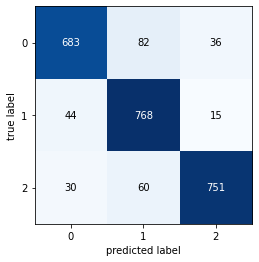

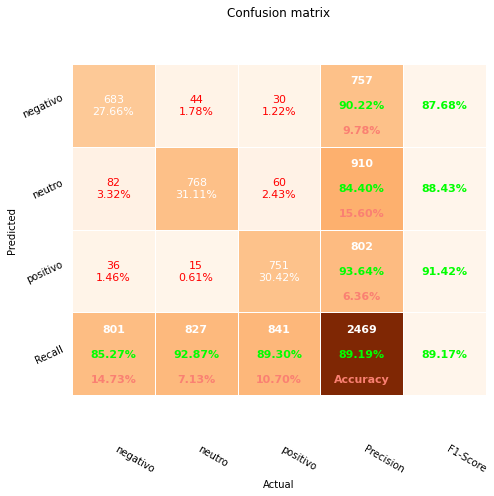

In [26]:
matriz_confusao(y_test_1, modelo1_pred_under)

In [27]:
# validação cruzada - modelo 1

validacao_cruzada1 = cross_val_predict(modelo1_under, X_1, y_1, cv=10)

In [28]:
metrics.accuracy_score(y_1, validacao_cruzada1)

0.9008406765927276

              precision    recall  f1-score   support

    negativo       0.92      0.87      0.89      3291
      neutro       0.85      0.95      0.90      3291
    positivo       0.94      0.89      0.91      3291

    accuracy                           0.90      9873
   macro avg       0.90      0.90      0.90      9873
weighted avg       0.90      0.90      0.90      9873



Predito   negativo  neutro  positivo   All
Real                                      
negativo      2863     310       118  3291
neutro         110    3115        66  3291
positivo       140     235      2916  3291
All           3113    3660      3100  9873 




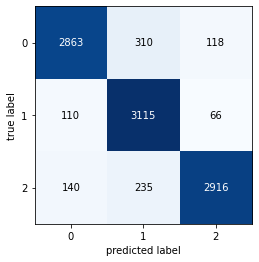

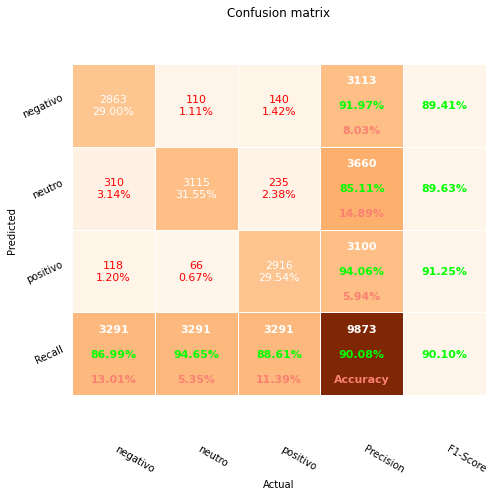

In [29]:
matriz_confusao(y_1, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [30]:
modelo2_under = escolher_pipeline(2)
modelo2_under = modelo2_under.fit(X_train_1, y_train_1)
modelo2_pred_under = modelo2_under.predict(X_text_1)

In [31]:
modelo2_pred_under

array(['positivo', 'neutro', 'positivo', ..., 'neutro', 'negativo',
       'negativo'], dtype='<U8')

In [32]:
# avaliando o modelo 2

metrics.accuracy_score(y_test_1, modelo2_pred_under)

0.8853786958282706

              precision    recall  f1-score   support

    negativo       0.88      0.87      0.87       801
      neutro       0.85      0.90      0.87       827
    positivo       0.93      0.89      0.91       841

    accuracy                           0.89      2469
   macro avg       0.89      0.89      0.89      2469
weighted avg       0.89      0.89      0.89      2469



Predito   negativo  neutro  positivo   All
Real                                      
negativo       694      76        31   801
neutro          58     745        24   827
positivo        34      60       747   841
All            786     881       802  2469 




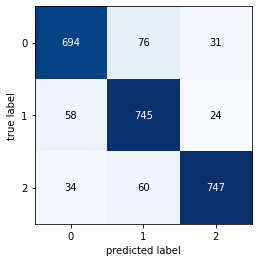

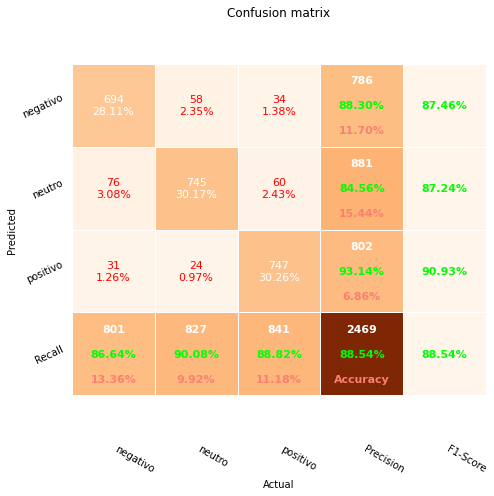

In [33]:
matriz_confusao(y_test_1, modelo2_pred_under)

In [34]:
# validação cruzada - modelo 2

validacao_cruzada2 = cross_val_predict(modelo2_under, X_1, y_1, cv=10)

In [35]:
metrics.accuracy_score(y_1, validacao_cruzada2)

0.886052871467639

              precision    recall  f1-score   support

    negativo       0.89      0.86      0.87      3291
      neutro       0.85      0.92      0.88      3291
    positivo       0.92      0.88      0.90      3291

    accuracy                           0.89      9873
   macro avg       0.89      0.89      0.89      9873
weighted avg       0.89      0.89      0.89      9873



Predito   negativo  neutro  positivo   All
Real                                      
negativo      2825     332       134  3291
neutro         169    3017       105  3291
positivo       174     211      2906  3291
All           3168    3560      3145  9873 




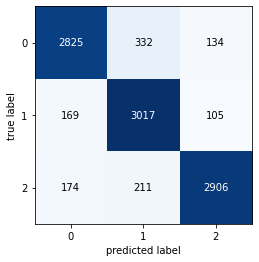

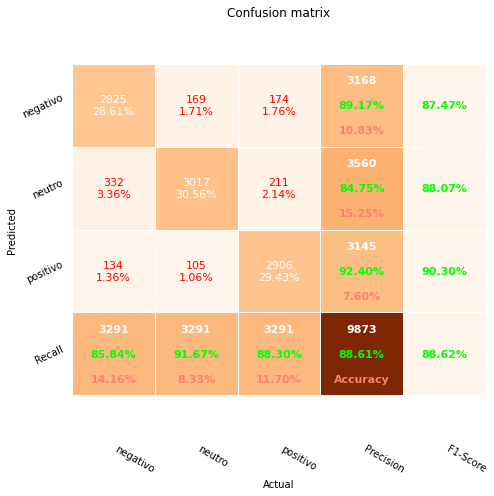

In [36]:
matriz_confusao(y_1, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [37]:
modelo3_under = escolher_pipeline(3)
modelo3_under = modelo3_under.fit(X_train_1, y_train_1)
modelo3_pred_under = modelo3_under.predict(X_text_1)

In [38]:
modelo3_pred_under

array(['positivo', 'neutro', 'positivo', ..., 'neutro', 'neutro',
       'negativo'], dtype='<U8')

In [39]:
# avaliando o modelo 3

metrics.accuracy_score(y_test_1, modelo3_pred_under)

0.8096395301741596

              precision    recall  f1-score   support

    negativo       0.72      0.84      0.78       801
      neutro       0.85      0.80      0.82       827
    positivo       0.87      0.79      0.83       841

    accuracy                           0.81      2469
   macro avg       0.82      0.81      0.81      2469
weighted avg       0.82      0.81      0.81      2469



Predito   negativo  neutro  positivo   All
Real                                      
negativo       671      72        58   801
neutro         128     661        38   827
positivo       128      46       667   841
All            927     779       763  2469 




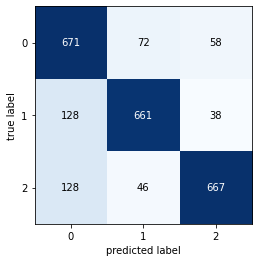

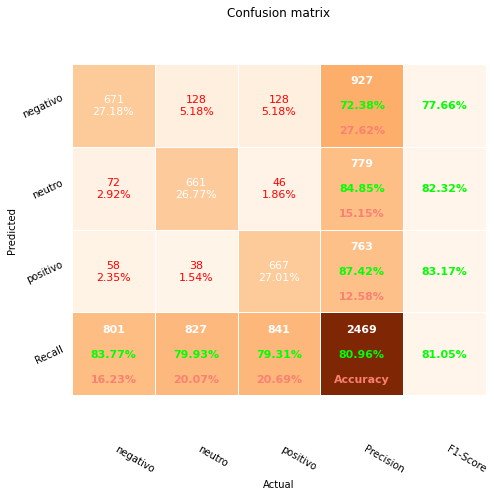

In [40]:
matriz_confusao(y_test_1, modelo3_pred_under)

In [41]:
# validação cruzada - modelo 3

validacao_cruzada3 = cross_val_predict(modelo3_under, X_1, y_1, cv=10)

In [42]:
metrics.accuracy_score(y_1, validacao_cruzada3)

0.8190013167223742

              precision    recall  f1-score   support

    negativo       0.75      0.85      0.80      3291
      neutro       0.85      0.81      0.83      3291
    positivo       0.88      0.79      0.83      3291

    accuracy                           0.82      9873
   macro avg       0.82      0.82      0.82      9873
weighted avg       0.82      0.82      0.82      9873



Predito   negativo  neutro  positivo   All
Real                                      
negativo      2800     286       205  3291
neutro         460    2673       158  3291
positivo       485     193      2613  3291
All           3745    3152      2976  9873 




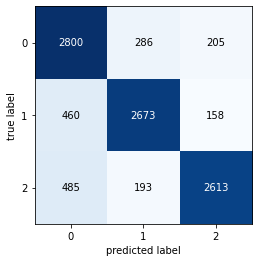

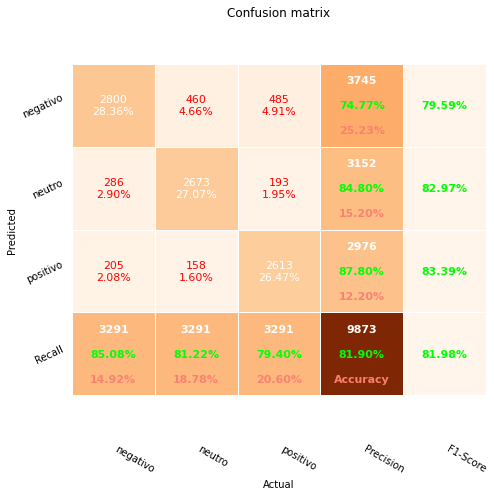

In [43]:
matriz_confusao(y_1, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [44]:
modelo4_under = escolher_pipeline(4)
modelo4_under = modelo4_under.fit(X_train_1, y_train_1)
modelo4_pred_under = modelo4_under.predict(X_text_1)

In [45]:
modelo4_pred_under

array(['positivo', 'neutro', 'positivo', ..., 'neutro', 'negativo',
       'negativo'], dtype='<U8')

In [46]:
# avaliando o modelo 4

metrics.accuracy_score(y_test_1, modelo4_pred_under)

0.8088294856217092

              precision    recall  f1-score   support

    negativo       0.72      0.85      0.78       801
      neutro       0.84      0.80      0.82       827
    positivo       0.89      0.78      0.83       841

    accuracy                           0.81      2469
   macro avg       0.82      0.81      0.81      2469
weighted avg       0.82      0.81      0.81      2469



Predito   negativo  neutro  positivo   All
Real                                      
negativo       678      74        49   801
neutro         133     662        32   827
positivo       131      53       657   841
All            942     789       738  2469 




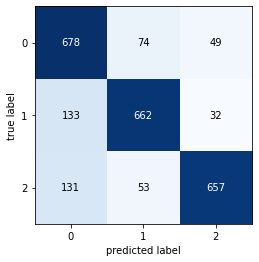

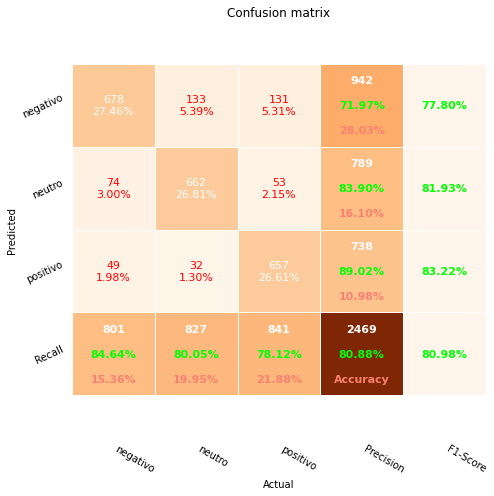

In [47]:
matriz_confusao(y_test_1, modelo4_pred_under)

In [48]:
# validação cruzada - modelo 4

validacao_cruzada4 = cross_val_predict(modelo4_under, X_1, y_1, cv=10)

In [49]:
metrics.accuracy_score(y_1, validacao_cruzada4)

0.8216347614706776

              precision    recall  f1-score   support

    negativo       0.75      0.86      0.80      3291
      neutro       0.84      0.82      0.83      3291
    positivo       0.89      0.78      0.83      3291

    accuracy                           0.82      9873
   macro avg       0.83      0.82      0.82      9873
weighted avg       0.83      0.82      0.82      9873



Predito   negativo  neutro  positivo   All
Real                                      
negativo      2842     276       173  3291
neutro         448    2705       138  3291
positivo       497     229      2565  3291
All           3787    3210      2876  9873 




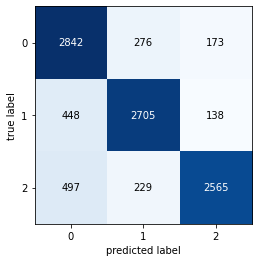

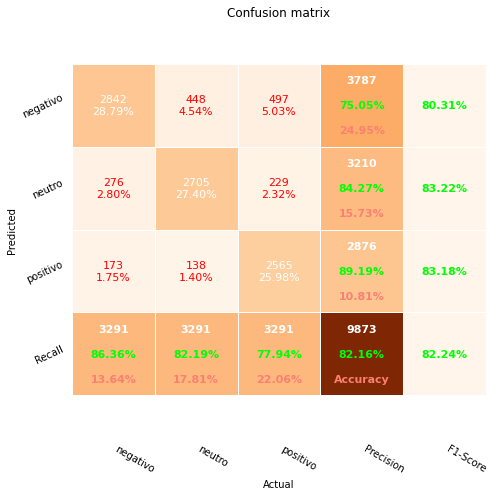

In [50]:
matriz_confusao(y_1, validacao_cruzada4)

# Machine Learning - Construindo modelo com dados originais


In [51]:
X_2 = tweets_df['tweet_clean']
y_2 = tweets_df['label']

In [52]:
X_2.shape, y_2.shape

((12000,), (12000,))

In [53]:
X_train_2, X_text_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=123)
X_train_2.shape, y_train_2.shape, X_text_2.shape, y_test_2.shape

((9000,), (9000,), (3000,), (3000,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [54]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train_2, y_train_2)
modelo1_pred_orig = modelo1_orig.predict(X_text_2)

In [55]:
modelo1_pred_orig

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro',
       'positivo'], dtype='<U8')

In [56]:
# avaliando o modelo 1

metrics.accuracy_score(y_test_2, modelo1_pred_orig)


0.8776666666666667

              precision    recall  f1-score   support

    negativo       0.89      0.82      0.86      1085
      neutro       0.84      0.93      0.88      1093
    positivo       0.91      0.89      0.90       822

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



Predito   negativo  neutro  positivo   All
Real                                      
negativo       892     137        56  1085
neutro          65    1013        15  1093
positivo        40      54       728   822
All            997    1204       799  3000 




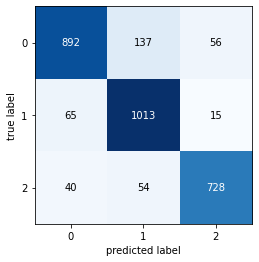

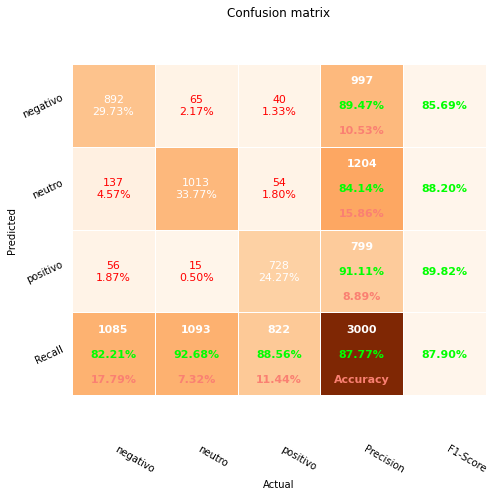

In [57]:
matriz_confusao(y_test_2, modelo1_pred_orig)

In [58]:
# validação cruzada - modelo 1

validacao_cruzada1 = cross_val_predict(modelo1_orig, X_2, y_2, cv=10)

In [59]:
metrics.accuracy_score(y_2, validacao_cruzada1)

0.8799166666666667

              precision    recall  f1-score   support

    negativo       0.90      0.83      0.86      4369
      neutro       0.84      0.93      0.88      4340
    positivo       0.92      0.88      0.90      3291

    accuracy                           0.88     12000
   macro avg       0.89      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3632     566       171   4369
neutro         228    4038        74   4340
positivo       174     228      2889   3291
All           4034    4832      3134  12000 




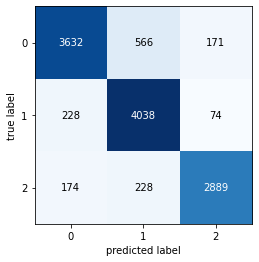

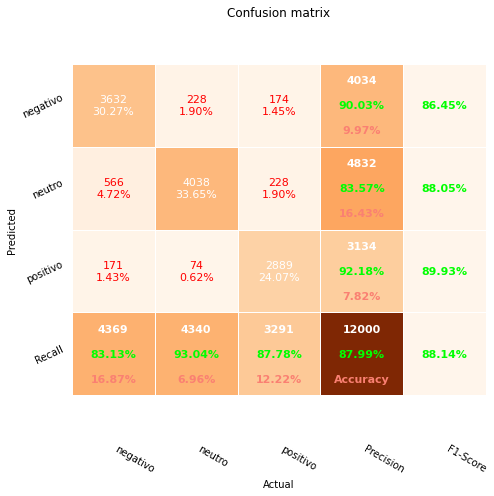

In [60]:
matriz_confusao(y_2, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [61]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_under.fit(X_train_2, y_train_2)
modelo2_pred_orig = modelo2_orig.predict(X_text_2)

In [62]:
modelo2_pred_orig

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro',
       'positivo'], dtype='<U8')

In [63]:
# avaliando o modelo 2

metrics.accuracy_score(y_test_2, modelo2_pred_orig)

0.8526666666666667

              precision    recall  f1-score   support

    negativo       0.84      0.81      0.83      1085
      neutro       0.82      0.89      0.86      1093
    positivo       0.91      0.85      0.88       822

    accuracy                           0.85      3000
   macro avg       0.86      0.85      0.86      3000
weighted avg       0.85      0.85      0.85      3000



Predito   negativo  neutro  positivo   All
Real                                      
negativo       882     148        55  1085
neutro         105     974        14  1093
positivo        57      63       702   822
All           1044    1185       771  3000 




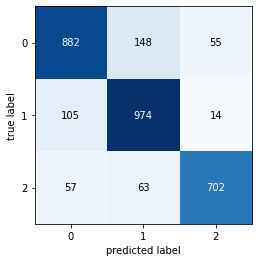

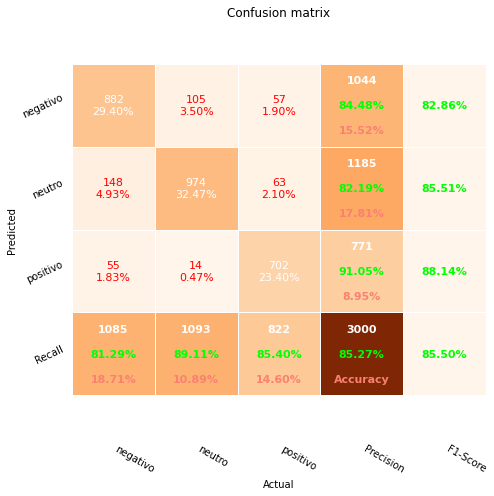

In [64]:
matriz_confusao(y_test_2, modelo2_pred_orig)

In [65]:
# validação cruzada - modelo 2

validacao_cruzada2 = cross_val_predict(modelo2_orig, X_2, y_2, cv=10)

In [66]:
metrics.accuracy_score(y_2, validacao_cruzada2)

0.8629166666666667

              precision    recall  f1-score   support

    negativo       0.87      0.83      0.85      4369
      neutro       0.82      0.91      0.86      4340
    positivo       0.92      0.85      0.88      3291

    accuracy                           0.86     12000
   macro avg       0.87      0.86      0.86     12000
weighted avg       0.87      0.86      0.86     12000



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3607     595       167   4369
neutro         307    3942        91   4340
positivo       227     258      2806   3291
All           4141    4795      3064  12000 




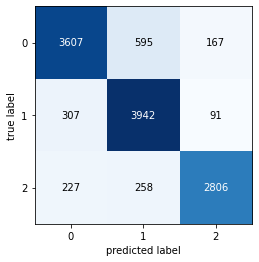

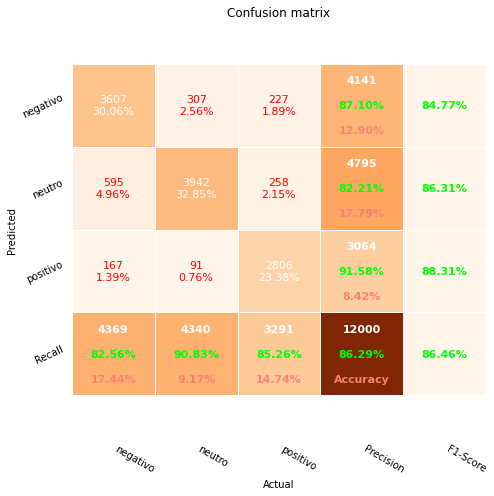

In [67]:
matriz_confusao(y_2, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [68]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_under.fit(X_train_2, y_train_2)
modelo3_pred_orig = modelo3_orig.predict(X_text_2)

In [69]:
modelo3_pred_orig

array(['negativo', 'neutro', 'negativo', ..., 'neutro', 'negativo',
       'positivo'], dtype='<U8')

In [70]:
# avaliando o modelo 3

metrics.accuracy_score(y_test_2, modelo3_pred_orig)

0.7893333333333333

              precision    recall  f1-score   support

    negativo       0.71      0.86      0.78      1085
      neutro       0.84      0.76      0.80      1093
    positivo       0.87      0.74      0.80       822

    accuracy                           0.79      3000
   macro avg       0.81      0.79      0.79      3000
weighted avg       0.80      0.79      0.79      3000



Predito   negativo  neutro  positivo   All
Real                                      
negativo       928     100        57  1085
neutro         230     830        33  1093
positivo       150      62       610   822
All           1308     992       700  3000 




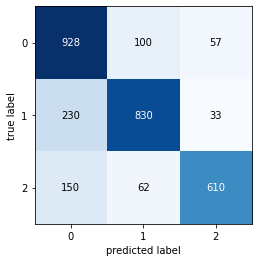

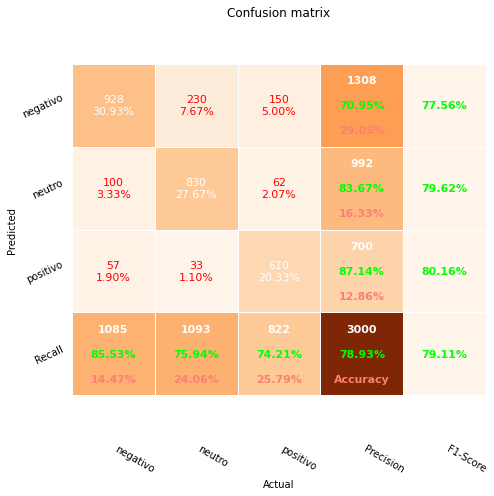

In [71]:
matriz_confusao(y_test_2, modelo3_pred_orig)

In [72]:
# validação cruzada - modelo 3

validacao_cruzada3 = cross_val_predict(modelo3_orig, X_2, y_2, cv=10)

In [73]:
metrics.accuracy_score(y_2, validacao_cruzada3)

0.795

              precision    recall  f1-score   support

    negativo       0.72      0.85      0.78      4369
      neutro       0.83      0.78      0.81      4340
    positivo       0.87      0.74      0.80      3291

    accuracy                           0.80     12000
   macro avg       0.81      0.79      0.80     12000
weighted avg       0.80      0.80      0.80     12000



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3699     453       217   4369
neutro         795    3390       155   4340
positivo       613     227      2451   3291
All           5107    4070      2823  12000 




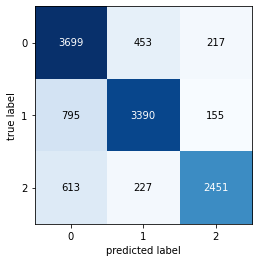

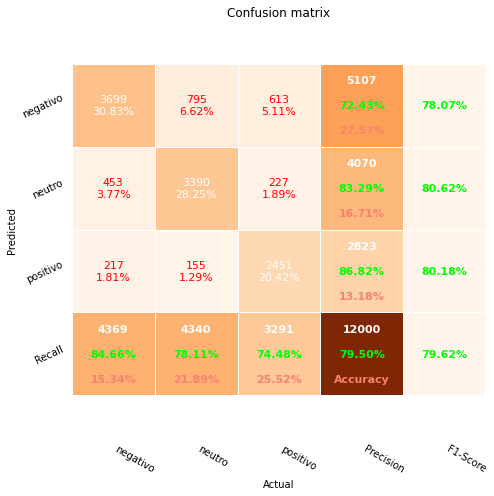

In [74]:
matriz_confusao(y_2, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [75]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_under.fit(X_train_2, y_train_2)
modelo4_pred_orig = modelo4_orig.predict(X_text_2)

In [76]:
modelo4_pred_orig

array(['negativo', 'neutro', 'negativo', ..., 'neutro', 'negativo',
       'positivo'], dtype='<U8')

In [77]:
# avaliando o modelo 4

metrics.accuracy_score(y_test_2, modelo4_pred_orig)

0.7676666666666667

              precision    recall  f1-score   support

    negativo       0.68      0.87      0.76      1085
      neutro       0.81      0.76      0.79      1093
    positivo       0.91      0.64      0.75       822

    accuracy                           0.77      3000
   macro avg       0.80      0.76      0.77      3000
weighted avg       0.79      0.77      0.77      3000



Predito   negativo  neutro  positivo   All
Real                                      
negativo       944     107        34  1085
neutro         243     833        17  1093
positivo       210      86       526   822
All           1397    1026       577  3000 




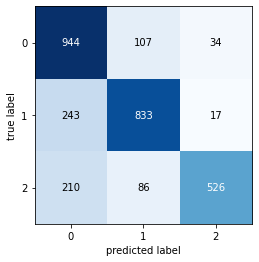

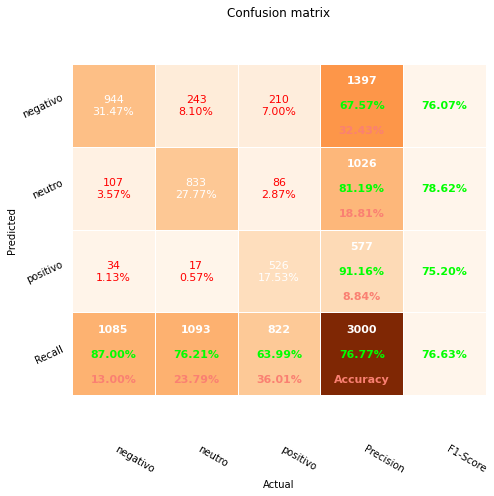

In [78]:
matriz_confusao(y_test_2, modelo4_pred_orig)

In [79]:
# validação cruzada - modelo 4

validacao_cruzada4 = cross_val_predict(modelo4_orig, X_2, y_2, cv=10)

In [80]:
metrics.accuracy_score(y_2, validacao_cruzada4)

0.787

              precision    recall  f1-score   support

    negativo       0.71      0.87      0.78      4369
      neutro       0.82      0.80      0.81      4340
    positivo       0.91      0.67      0.77      3291

    accuracy                           0.79     12000
   macro avg       0.81      0.78      0.79     12000
weighted avg       0.80      0.79      0.79     12000



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3801     437       131   4369
neutro         811    3454        75   4340
positivo       771     331      2189   3291
All           5383    4222      2395  12000 




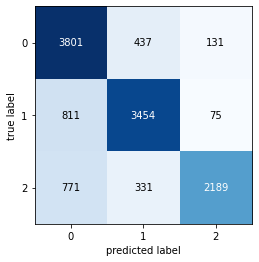

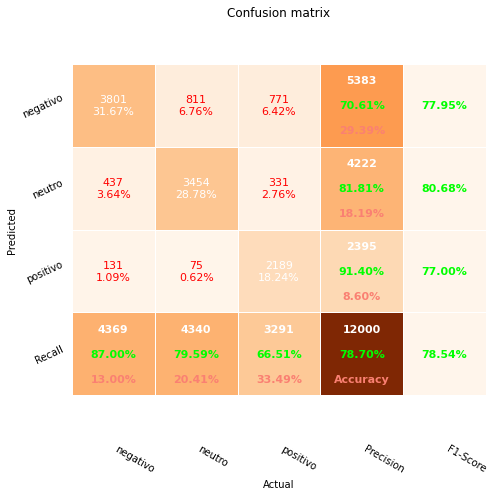

In [81]:
matriz_confusao(y_2, validacao_cruzada4)

## Machine Learning - Construindo modelo com dados oversampling

In [82]:
X_3 = tweets_df_equilibrado_maior['tweet_clean']
y_3 = tweets_df_equilibrado_maior['label']

X_3.shape, y_3.shape

((13107,), (13107,))

In [83]:
X_train_3, X_text_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.25, random_state=123)

In [84]:
X_train_3.shape, y_train_3.shape, X_text_3.shape, y_test_3.shape

((9830,), (9830,), (3277,), (3277,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [85]:
modelo1_over = escolher_pipeline(1)
modelo1_over = modelo1_over.fit(X_train_3, y_train_3)
modelo1_pred_over = modelo1_over.predict(X_text_3)

In [86]:
modelo1_pred_over

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro', 'neutro'],
      dtype='<U8')

In [87]:
# avaliando o modelo 1

metrics.accuracy_score(y_test_3, modelo1_pred_over)

0.9111992676228258

              precision    recall  f1-score   support

    negativo       0.93      0.84      0.88      1078
      neutro       0.86      0.95      0.90      1107
    positivo       0.95      0.95      0.95      1092

    accuracy                           0.91      3277
   macro avg       0.91      0.91      0.91      3277
weighted avg       0.91      0.91      0.91      3277



Predito   negativo  neutro  positivo   All
Real                                      
negativo       906     130        42  1078
neutro          43    1048        16  1107
positivo        24      36      1032  1092
All            973    1214      1090  3277 




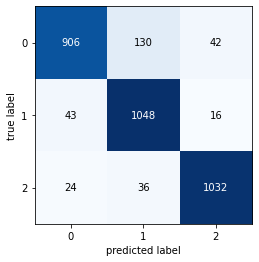

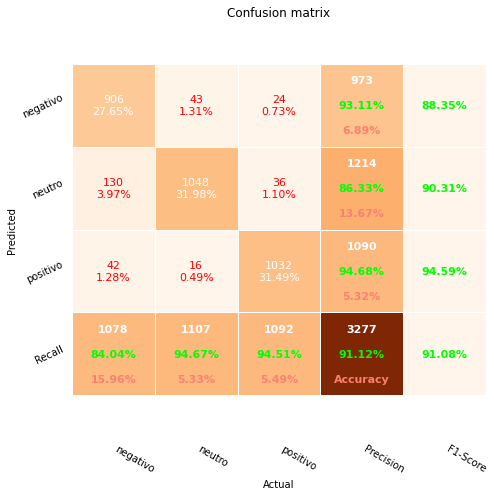

In [88]:
matriz_confusao(y_test_3, modelo1_pred_over)

In [89]:
# validação cruzada - modelo 1

validacao_cruzada1 = cross_val_predict(modelo1_over, X_3, y_3, cv=10)

In [90]:
metrics.accuracy_score(y_3, validacao_cruzada1)

0.9147783627069505

              precision    recall  f1-score   support

    negativo       0.93      0.84      0.88      4369
      neutro       0.87      0.95      0.91      4369
    positivo       0.95      0.95      0.95      4369

    accuracy                           0.91     13107
   macro avg       0.92      0.91      0.91     13107
weighted avg       0.92      0.91      0.91     13107



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3663     541       165   4369
neutro         163    4160        46   4369
positivo        96     106      4167   4369
All           3922    4807      4378  13107 




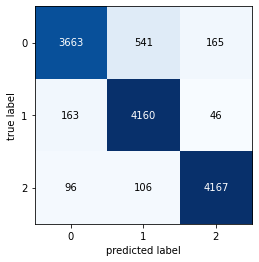

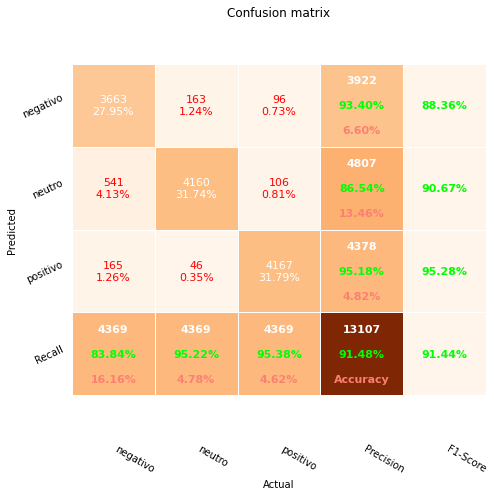

In [91]:
matriz_confusao(y_3, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [92]:
modelo2_over = escolher_pipeline(2)
modelo2_over = modelo2_over.fit(X_train_3, y_train_3)
modelo2_pred_over = modelo2_over.predict(X_text_3)

In [93]:
modelo2_pred_over

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro', 'neutro'],
      dtype='<U8')

In [94]:
# avaliando o modelo 2

metrics.accuracy_score(y_test_3, modelo2_pred_over)

0.8989929813854135

              precision    recall  f1-score   support

    negativo       0.89      0.84      0.87      1078
      neutro       0.87      0.92      0.90      1107
    positivo       0.94      0.93      0.93      1092

    accuracy                           0.90      3277
   macro avg       0.90      0.90      0.90      3277
weighted avg       0.90      0.90      0.90      3277



Predito   negativo  neutro  positivo   All
Real                                      
negativo       906     123        49  1078
neutro          66    1023        18  1107
positivo        44      31      1017  1092
All           1016    1177      1084  3277 




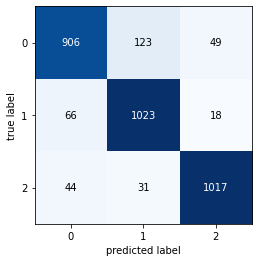

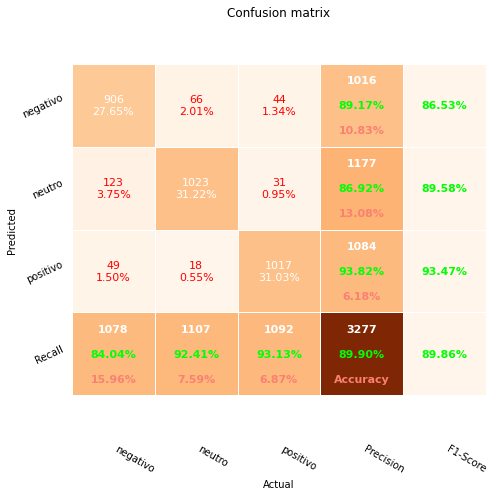

In [95]:
matriz_confusao(y_test_3, modelo2_pred_over)

In [96]:
# validação cruzada - modelo 2

validacao_cruzada2 = cross_val_predict(modelo2_over, X_3, y_3, cv=10)

In [97]:
metrics.accuracy_score(y_3, validacao_cruzada2)

0.899824521248188

              precision    recall  f1-score   support

    negativo       0.91      0.83      0.87      4369
      neutro       0.86      0.93      0.89      4369
    positivo       0.94      0.93      0.94      4369

    accuracy                           0.90     13107
   macro avg       0.90      0.90      0.90     13107
weighted avg       0.90      0.90      0.90     13107



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3632     538       199   4369
neutro         217    4080        72   4369
positivo       144     143      4082   4369
All           3993    4761      4353  13107 




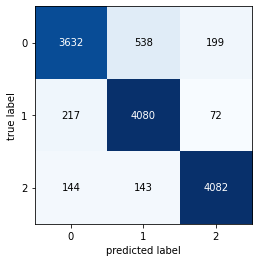

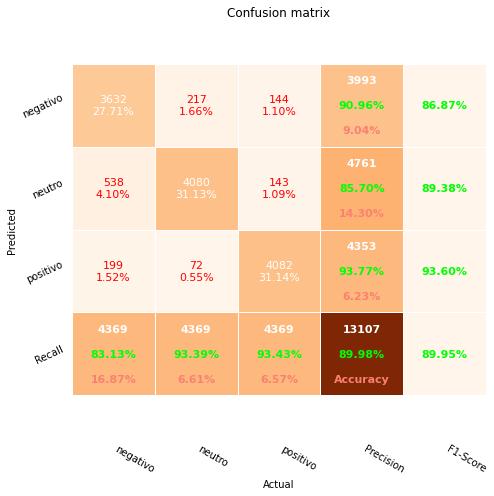

In [98]:
matriz_confusao(y_3, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [99]:
modelo3_over = escolher_pipeline(3)
modelo3_over = modelo3_over.fit(X_train_3, y_train_3)
modelo3_pred_over = modelo3_over.predict(X_text_3)

In [100]:
modelo3_pred_over

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro', 'neutro'],
      dtype='<U8')

In [101]:
# avaliando o modelo 3

metrics.accuracy_score(y_test_3, modelo3_pred_over)

0.8373512358864815

              precision    recall  f1-score   support

    negativo       0.76      0.84      0.80      1078
      neutro       0.88      0.81      0.85      1107
    positivo       0.88      0.86      0.87      1092

    accuracy                           0.84      3277
   macro avg       0.84      0.84      0.84      3277
weighted avg       0.84      0.84      0.84      3277



Predito   negativo  neutro  positivo   All
Real                                      
negativo       908      96        74  1078
neutro         158     897        52  1107
positivo       130      23       939  1092
All           1196    1016      1065  3277 




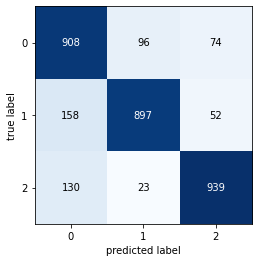

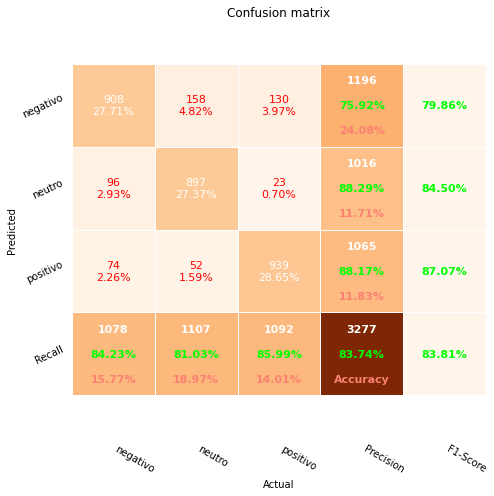

In [102]:
matriz_confusao(y_test_3, modelo3_pred_over)

In [103]:
# validação cruzada - modelo 3

validacao_cruzada3 = cross_val_predict(modelo3_over, X_3, y_3, cv=10)

In [104]:
metrics.accuracy_score(y_3, validacao_cruzada3)

0.8457312886243992

              precision    recall  f1-score   support

    negativo       0.79      0.82      0.81      4369
      neutro       0.86      0.83      0.85      4369
    positivo       0.89      0.88      0.88      4369

    accuracy                           0.85     13107
   macro avg       0.85      0.85      0.85     13107
weighted avg       0.85      0.85      0.85     13107



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3603     467       299   4369
neutro         544    3646       179   4369
positivo       407     126      3836   4369
All           4554    4239      4314  13107 




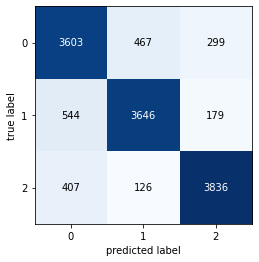

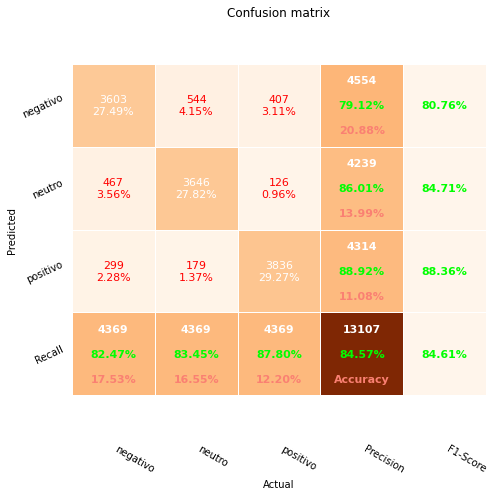

In [105]:
matriz_confusao(y_3, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [106]:
modelo4_over = escolher_pipeline(4)
modelo4_over = modelo4_over.fit(X_train_3, y_train_3)
modelo4_pred_over = modelo4_over.predict(X_text_3)

In [107]:
modelo4_pred_over

array(['positivo', 'neutro', 'neutro', ..., 'neutro', 'neutro', 'neutro'],
      dtype='<U8')

In [108]:
# avaliando o modelo 4

metrics.accuracy_score(y_test_3, modelo4_pred_over)

0.8394873359780287

              precision    recall  f1-score   support

    negativo       0.76      0.85      0.80      1078
      neutro       0.87      0.82      0.85      1107
    positivo       0.90      0.85      0.87      1092

    accuracy                           0.84      3277
   macro avg       0.84      0.84      0.84      3277
weighted avg       0.84      0.84      0.84      3277



Predito   negativo  neutro  positivo   All
Real                                      
negativo       914     102        62  1078
neutro         154     908        45  1107
positivo       132      31       929  1092
All           1200    1041      1036  3277 




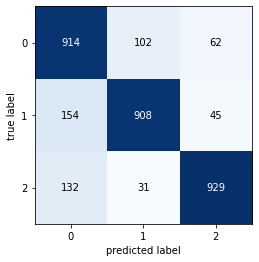

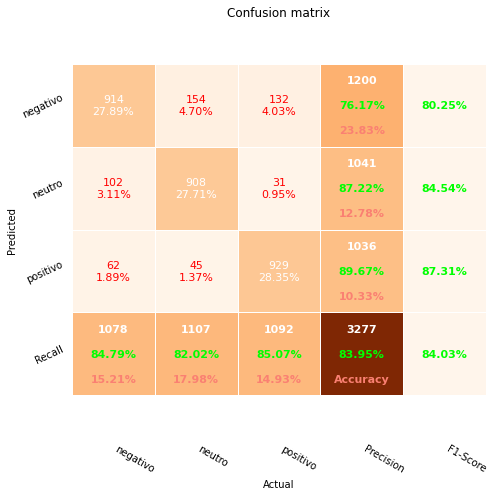

In [109]:
matriz_confusao(y_test_3, modelo4_pred_over)

In [110]:
# validação cruzada - modelo 4

validacao_cruzada4 = cross_val_predict(modelo4_over, X_3, y_3, cv=10)

In [111]:
metrics.accuracy_score(y_3, validacao_cruzada4)

0.8479438467994201

              precision    recall  f1-score   support

    negativo       0.80      0.83      0.82      4369
      neutro       0.86      0.84      0.85      4369
    positivo       0.90      0.87      0.88      4369

    accuracy                           0.85     13107
   macro avg       0.85      0.85      0.85     13107
weighted avg       0.85      0.85      0.85     13107



Predito   negativo  neutro  positivo    All
Real                                       
negativo      3643     463       263   4369
neutro         517    3669       183   4369
positivo       408     159      3802   4369
All           4568    4291      4248  13107 




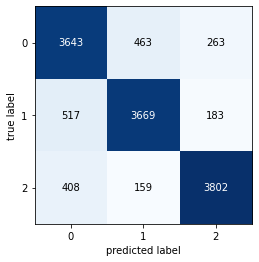

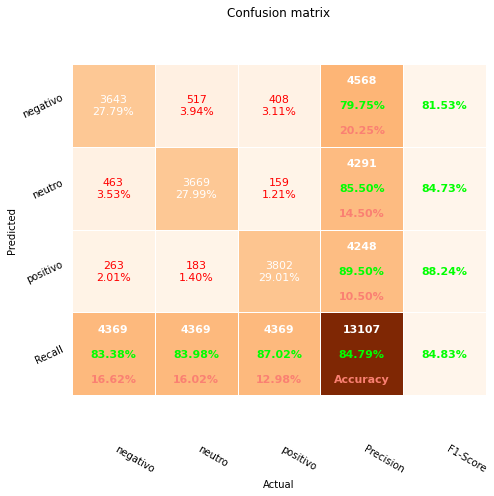

In [112]:
matriz_confusao(y_3, validacao_cruzada4)